# REPORT

## Learning Algorithm

Two algorithms were used to solve this environment: DDPG and MADDPG. The environment has 2 competing agents, both they both benefit if they keep the ball in play. DDPG uses a shared replay buffer as well as shared critic and actor networks. It took many episodes to start learning, but once it did, it solved the environment quickly. MADDPG uses the same replay buffer but different critic and actor networks for each agent. Using that algorithm, the learning began rather quickly but took a substantial amount of episodes to solve the environment. The MADDPG implementation was chosen because it took less episodes and it made for a more interesting (non-mirrored - as in the case of DDPG) movement of the tennis paddles.

Hyperparameters used:
* BUFFER_SIZE = int(1e5)    # replay buffer size
* BATCH_SIZE = 256          # batch size
* GAMMA = 0.99              # discount factor
* TAU = 5e-2                # for soft update of target parameters
* LR_ACTOR = 5e-4           # learning rate of the actor
* LR_CRITIC = 5e-3          # learning rate of the critic
* WEIGHT_DECAY = 0          # weight decay for the optimizers
* UPDATE_EVERY = 1          # how often to update the network

* AVERAGE_SCORE_SOLVED=0.5  # average score (over 100 consecutive episodes) needed to solve the environment
* EPSILON = 2               # for scaling the noise added to the actions (exploration)
* EPSILON_DECAY = 0.9999    # for decaying the noise during training


Following things were tested in order to find the best possible hyperparameters:
 * Only learn each Nth timestep
 * Change batch size: medium batch size of 256 proved to be more effective
 * Change size of networks: smaller sized networks learned faster and were generally more stable
 * Faster learning rates and TAU than for the DDPG solution worked better
 * Adding epsilon decay to reduce the noise down to 0 in later episodes proved to be quite effective at stabilizing learning
 

In order to store/update the actor's policy model eight deep neural networks were used - 2 for the actor network and 2 for the critic for each of the agents. The actor networks had 2 hidden layers (64, 32) and the critic networks had 2 hidden layers (64, 32). Smaller network sizes provided for a more stable and quick learning. (See model.py for the implementation)

## Plot of Rewards

These are the average scores during training for both DDPG and MADDPG algorithms:

DDPG:\
Episode 100 	Average Score: 0.01\
Episode 200 	Average Score: 0.01\
Episode 300 	Average Score: 0.02\
Episode 400 	Average Score: 0.00\
Episode 500 	Average Score: 0.00\
Episode 600 	Average Score: 0.00\
Episode 700 	Average Score: 0.00\
Episode 800 	Average Score: 0.00\
Episode 900 	Average Score: 0.00\
Episode 1000	Average Score: 0.07\
Episode 1100	Average Score: 0.09\
Episode 1200	Average Score: 0.10\
Episode 1300	Average Score: 0.24\
Episode 1400	Average Score: 0.33\
Episode 1500	Average Score: 0.32\
Episode 1600	Average Score: 0.44\
Episode 1700	Average Score: 0.33\
Episode 1800	Average Score: 0.45\
Episode 1813	Average Score: 0.51\
Environment solved in 1713 episodes!	Average Score: 0.51

MADDPG:\
Episode 100 	Average Score: 0.0199\
Episode 200 	Average Score: 0.0466\
Episode 300 	Average Score: 0.0553\
Episode 400 	Average Score: 0.0926\
Episode 500 	Average Score: 0.1137\
Episode 600 	Average Score: 0.1780\
Episode 700 	Average Score: 0.2692\
Episode 800 	Average Score: 0.1758\
Episode 900 	Average Score: 0.4098\
Episode 1000    Average Score: 0.2985\
Episode 1100    Average Score: 0.2077\
Episode 1197    Average Score: 0.5045\
Environment solved in 1097 episodes!	Average Score: 0.50	Total Time: 25 minutes 48 seconds

Below is the plot of scores achieved by the agent during training for DDPG, MADDPG as well as a plot of rolling averages of the scores for MADDPG. In this particular run the environment was solved in 1097 episodes (MADDPG). Run the cell below to see a plot of the scores achieved by the agent.

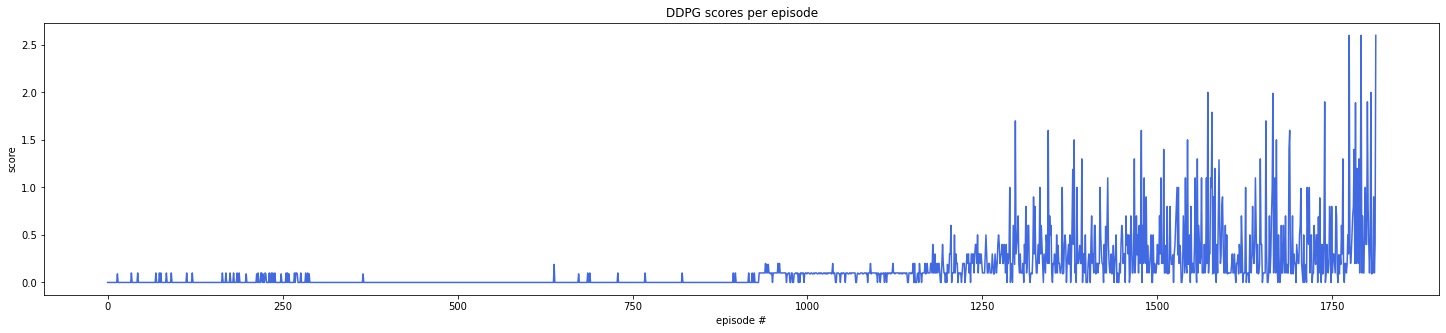

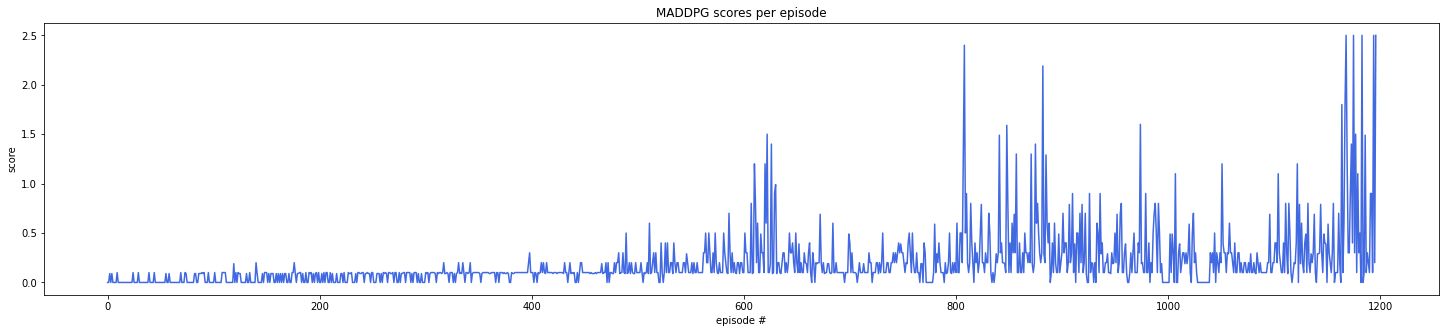

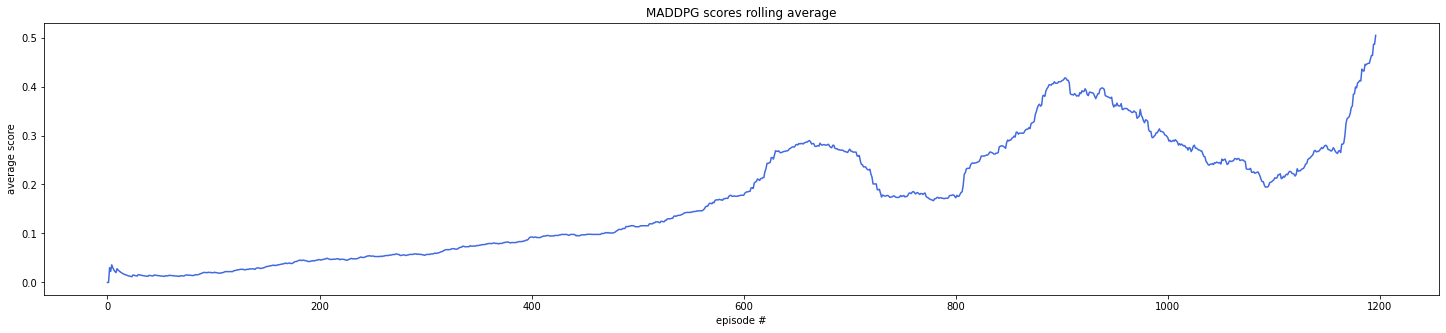

In [1]:
from utils import plot_scores

ddpg_scores = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.0, 0.10000000149011612, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.09000000357627869, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19000000320374966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000357627869, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.19000000320374966, 0.10000000149011612, 0.19000000320374966, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.0, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.0, 0.20000000298023224, 0.0, 0.0, 0.0, 0.09000000171363354, 0.10000000149011612, 0.0, 0.20000000298023224, 0.10000000149011612, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.0, 0.0, 0.20000000298023224, 0.4000000059604645, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.19000000320374966, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.30000000447034836, 0.6000000089406967, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5000000074505806, 0.10000000149011612, 0.30000000447034836, 0.20000000298023224, 0.20000000298023224, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.0, 0.09000000171363354, 0.20000000298023224, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.20000000298023224, 0.0, 0.30000000447034836, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.2900000046938658, 0.4000000059604645, 0.4000000059604645, 0.20000000298023224, 0.5000000074505806, 0.10000000149011612, 0.30000000447034836, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.5000000074505806, 0.2900000046938658, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.20000000298023224, 0.09000000171363354, 0.09000000171363354, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.4000000059604645, 0.5000000074505806, 0.4000000059604645, 0.20000000298023224, 0.2900000065565109, 0.30000000447034836, 0.4000000059604645, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.30000000447034836, 0.10000000149011612, 0.4000000059604645, 0.0, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 1.0000000149011612, 0.0, 0.20000000298023224, 0.10000000149011612, 0.0, 0.6000000089406967, 0.4000000059604645, 0.19000000320374966, 1.700000025331974, 0.30000000447034836, 0.4000000059604645, 0.5000000074505806, 0.7000000104308128, 0.19000000320374966, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.0, 0.4000000059604645, 0.20000000298023224, 0.800000011920929, 0.10000000149011612, 0.20000000298023224, 0.6000000089406967, 0.6000000089406967, 0.10000000149011612, 0.0, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.30000000447034836, 0.9000000134110451, 0.30000000447034836, 0.800000011920929, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.4000000059604645, 0.20000000298023224, 1.0000000149011612, 0.30000000447034836, 0.6000000089406967, 0.3900000061839819, 0.20000000298023224, 0.0, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.5000000074505806, 0.4000000059604645, 0.20000000298023224, 1.600000023841858, 0.20000000298023224, 0.7000000104308128, 0.5000000074505806, 0.6000000089406967, 0.10000000149011612, 0.0, 0.20000000298023224, 0.19000000320374966, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.5000000074505806, 0.10000000149011612, 0.3900000061839819, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 1.0000000149011612, 0.09000000357627869, 0.10000000149011612, 0.4000000059604645, 0.5000000074505806, 0.3900000061839819, 0.0, 0.20000000298023224, 0.30000000447034836, 0.4000000059604645, 0.19000000320374966, 0.5000000074505806, 0.0, 0.20000000298023224, 0.6000000089406967, 1.1900000181049109, 0.4000000059604645, 1.5000000223517418, 0.10000000149011612, 0.19000000320374966, 0.0, 1.0000000149011612, 0.20000000298023224, 0.20000000298023224, 0.2900000046938658, 0.3900000061839819, 0.20000000298023224, 0.20000000298023224, 1.3000000193715096, 0.0, 0.30000000447034836, 0.30000000447034836, 0.10000000149011612, 0.5000000074505806, 0.0, 0.0, 0.0, 0.20000000298023224, 0.30000000447034836, 0.19000000320374966, 0.0, 0.4000000059604645, 0.7000000104308128, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.6000000089406967, 0.6000000089406967, 0.09000000171363354, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 1.0000000149011612, 0.490000007674098, 0.30000000447034836, 0.20000000298023224, 0.19000000320374966, 0.0, 0.4000000059604645, 0.10000000149011612, 0.5900000091642141, 0.10000000149011612, 0.6000000089406967, 1.1000000163912773, 0.3900000061839819, 0.20000000298023224, 0.10000000149011612, 0.19000000320374966, 0.30000000447034836, 0.09000000171363354, 0.10000000149011612, 0.3900000061839819, 0.0, 0.19000000320374966, 0.30000000447034836, 0.5000000074505806, 0.0, 0.10000000149011612, 0.0, 0.0, 0.20000000298023224, 0.10000000149011612, 0.4000000059604645, 0.6000000089406967, 0.5000000074505806, 0.20000000298023224, 0.30000000447034836, 0.30000000447034836, 0.0, 0.7000000104308128, 0.3900000061839819, 0.5000000074505806, 0.30000000447034836, 0.5000000074505806, 0.0, 0.10000000149011612, 0.7000000104308128, 0.5000000074505806, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 1.3000000193715096, 0.10000000149011612, 0.30000000447034836, 0.7000000104308128, 0.2900000046938658, 0.5000000074505806, 0.10000000149011612, 0.6000000089406967, 0.20000000298023224, 0.6000000089406967, 1.600000023841858, 0.0, 0.6000000089406967, 0.20000000298023224, 1.1000000163912773, 0.2900000046938658, 0.20000000298023224, 0.9000000134110451, 0.10000000149011612, 0.3900000061839819, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.30000000447034836, 0.5000000074505806, 0.0, 0.0, 0.5000000074505806, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.4000000059604645, 0.20000000298023224, 0.19000000320374966, 0.7000000104308128, 0.30000000447034836, 1.1000000163912773, 0.20000000298023224, 0.2900000046938658, 0.20000000298023224, 1.4000000208616257, 0.10000000149011612, 0.10000000149011612, 0.3900000061839819, 0.10000000149011612, 0.800000011920929, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.800000011920929, 0.30000000447034836, 0.19000000320374966, 0.20000000298023224, 0.2900000046938658, 0.0, 0.30000000447034836, 0.3900000061839819, 0.6000000089406967, 0.800000011920929, 1.0000000149011612, 0.2900000046938658, 1.0000000149011612, 0.20000000298023224, 0.3900000061839819, 0.30000000447034836, 0.0, 0.0, 0.10000000149011612, 0.7000000104308128, 0.4000000059604645, 0.10000000149011612, 1.1000000163912773, 0.20000000298023224, 0.10000000149011612, 1.5000000223517418, 0.19000000320374966, 0.20000000298023224, 0.5000000074505806, 0.0, 0.800000011920929, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.4000000059604645, 1.1000000163912773, 0.20000000298023224, 0.0, 1.3000000193715096, 0.10000000149011612, 0.6000000089406967, 0.4000000059604645, 0.20000000298023224, 0.30000000447034836, 1.1000000163912773, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.20000000298023224, 1.1000000163912773, 0.20000000298023224, 2.0000000298023224, 0.10000000149011612, 0.30000000447034836, 0.30000000447034836, 1.1000000163912773, 1.0000000149011612, 1.7900000270456076, 0.09000000171363354, 0.9000000134110451, 0.10000000149011612, 1.2000000178813934, 0.09000000171363354, 0.0, 0.4000000059604645, 0.10000000149011612, 0.7000000104308128, 1.290000019595027, 0.6000000089406967, 0.20000000298023224, 0.30000000447034836, 0.800000011920929, 0.9000000134110451, 0.4000000059604645, 0.10000000149011612, 0.10000000149011612, 0.6000000089406967, 0.10000000149011612, 0.5000000074505806, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19000000320374966, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.0, 0.20000000298023224, 0.20000000298023224, 0.2900000046938658, 0.09000000171363354, 0.4000000059604645, 0.30000000447034836, 0.10000000149011612, 0.7000000104308128, 0.4000000059604645, 0.0, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 1.0000000149011612, 0.0, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.5000000074505806, 0.20000000298023224, 0.10000000149011612, 0.30000000447034836, 0.800000011920929, 0.30000000447034836, 0.20000000298023224, 0.4000000059604645, 1.1000000163912773, 0.6000000089406967, 0.10000000149011612, 0.4000000059604645, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 1.3000000193715096, 0.4000000059604645, 0.4000000059604645, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 1.700000025331974, 0.30000000447034836, 0.0, 0.0, 0.10000000149011612, 0.7000000104308128, 0.10000000149011612, 0.2900000046938658, 0.7000000104308128, 1.0000000149011612, 1.9900000300258398, 0.10000000149011612, 0.30000000447034836, 1.1000000163912773, 0.10000000149011612, 1.5000000223517418, 0.20000000298023224, 0.0, 0.5000000074505806, 0.20000000298023224, 0.0, 0.10000000149011612, 0.6000000089406967, 0.10000000149011612, 0.10000000149011612, 0.6000000089406967, 0.30000000447034836, 0.10000000149011612, 0.7000000104308128, 0.10000000149011612, 0.19000000320374966, 0.10000000149011612, 0.10000000149011612, 1.4000000208616257, 1.600000023841858, 0.20000000298023224, 0.09000000357627869, 0.30000000447034836, 0.7000000104308128, 0.09000000171363354, 0.30000000447034836, 0.20000000298023224, 0.20000000298023224, 0.0, 0.4000000059604645, 0.30000000447034836, 0.20000000298023224, 0.20000000298023224, 0.490000007674098, 0.6000000089406967, 0.9900000151246786, 0.20000000298023224, 0.10000000149011612, 0.0, 0.5000000074505806, 0.0, 0.10000000149011612, 0.19000000320374966, 0.0, 1.0000000149011612, 0.5000000074505806, 0.4000000059604645, 1.0000000149011612, 0.10000000149011612, 0.4000000059604645, 0.5000000074505806, 0.0, 0.10000000149011612, 0.10000000149011612, 0.6000000089406967, 0.30000000447034836, 0.19000000320374966, 0.5000000074505806, 0.5000000074505806, 0.0, 0.6900000106543303, 0.10000000149011612, 0.8900000136345625, 0.20000000298023224, 0.0, 0.4000000059604645, 0.09000000171363354, 0.10000000149011612, 0.5000000074505806, 1.9000000283122063, 0.0, 0.10000000149011612, 0.4000000059604645, 0.20000000298023224, 0.10000000149011612, 0.19000000320374966, 0.800000011920929, 0.5000000074505806, 0.0, 0.800000011920929, 0.10000000149011612, 0.30000000447034836, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.800000011920929, 0.7000000104308128, 0.10000000149011612, 0.0, 0.2900000065565109, 0.09000000357627869, 0.2900000046938658, 0.19000000320374966, 0.6000000089406967, 0.30000000447034836, 1.3000000193715096, 0.10000000149011612, 0.0, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.19000000320374966, 0.5000000074505806, 0.30000000447034836, 2.600000038743019, 0.4000000059604645, 0.20000000298023224, 0.30000000447034836, 0.5000000074505806, 0.7000000104308128, 0.800000011920929, 1.4000000208616257, 0.20000000298023224, 1.8900000285357237, 0.20000000298023224, 1.2000000178813934, 0.5000000074505806, 0.20000000298023224, 1.3000000193715096, 0.10000000149011612, 1.0000000149011612, 2.600000038743019, 0.10000000149011612, 0.7000000104308128, 0.10000000149011612, 0.10000000149011612, 0.6000000089406967, 1.0000000149011612, 0.4000000059604645, 0.4000000059604645, 1.9000000283122063, 0.800000011920929, 0.4000000059604645, 0.10000000149011612, 0.4000000059604645, 2.0000000298023224, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.9000000134110451, 0.10000000149011612, 0.4000000059604645, 2.600000038743019]
maddpg_scores = [0.0, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.10000000149011612, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.09000000171363354, 0.0, 0.0, 0.09000000171363354, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19000000320374966, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.09000000171363354, 0.09000000171363354, 0.0, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.09000000171363354, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.0, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.09000000171363354, 0.09000000171363354, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.0, 0.09000000171363354, 0.09000000171363354, 0.09000000171363354, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.0, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.0, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.0, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.0, 0.0, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.09000000171363354, 0.0, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.09000000171363354, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19000000320374966, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.0, 0.20000000298023224, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.30000000447034836, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.09000000171363354, 0.5000000074505806, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.09000000171363354, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.0, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.6000000089406967, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.4000000059604645, 0.10000000149011612, 0.0, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.09000000171363354, 0.4000000059604645, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.2900000046938658, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.30000000447034836, 0.5000000074505806, 0.20000000298023224, 0.20000000298023224, 0.5000000074505806, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.5000000074505806, 0.20000000298023224, 0.10000000149011612, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5000000074505806, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.09000000171363354, 0.7000000104308128, 0.30000000447034836, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.09000000171363354, 0.20000000298023224, 0.20000000298023224, 0.09000000171363354, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.5000000074505806, 0.30000000447034836, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.800000011920929, 0.09000000171363354, 0.10000000149011612, 1.2000000178813934, 0.800000011920929, 0.20000000298023224, 0.6000000089406967, 0.10000000149011612, 0.10000000149011612, 0.490000007674098, 0.30000000447034836, 0.30000000447034836, 0.10000000149011612, 1.2000000178813934, 0.6000000089406967, 1.5000000223517418, 0.10000000149011612, 0.10000000149011612, 0.1900000050663948, 1.4000000208616257, 0.09000000171363354, 0.10000000149011612, 0.9000000134110451, 0.9900000151246786, 0.09000000171363354, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.09000000171363354, 0.19000000320374966, 0.30000000447034836, 0.30000000447034836, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.5000000074505806, 0.30000000447034836, 0.30000000447034836, 0.4000000059604645, 0.20000000298023224, 0.10000000149011612, 0.5000000074505806, 0.20000000298023224, 0.10000000149011612, 0.3900000061839819, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.20000000298023224, 0.19000000320374966, 0.10000000149011612, 0.30000000447034836, 0.4000000059604645, 0.10000000149011612, 0.0, 0.30000000447034836, 0.1900000050663948, 0.0, 0.20000000298023224, 0.19000000320374966, 0.20000000298023224, 0.20000000298023224, 0.6900000106543303, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.09000000171363354, 0.10000000149011612, 0.10000000149011612, 0.19000000320374966, 0.19000000320374966, 0.10000000149011612, 0.09000000171363354, 0.10000000149011612, 0.6000000089406967, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.490000007674098, 0.4000000059604645, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.0, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19000000320374966, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.20000000298023224, 0.20000000298023224, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.5000000074505806, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 0.4000000059604645, 0.30000000447034836, 0.3900000061839819, 0.30000000447034836, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.19000000320374966, 0.4000000059604645, 0.5000000074505806, 0.30000000447034836, 0.10000000149011612, 0.5000000074505806, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.10000000149011612, 0.0, 0.19000000320374966, 0.19000000320374966, 0.0, 0.4000000059604645, 0.30000000447034836, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.5900000091642141, 0.10000000149011612, 0.2900000046938658, 0.20000000298023224, 0.4000000059604645, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.20000000298023224, 0.09000000171363354, 0.10000000149011612, 0.20000000298023224, 0.5000000074505806, 0.10000000149011612, 0.09000000171363354, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.6000000089406967, 0.10000000149011612, 0.10000000149011612, 0.5000000074505806, 0.5000000074505806, 0.20000000298023224, 1.3000000193715096, 2.400000035762787, 0.5000000074505806, 0.9000000134110451, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.800000011920929, 0.4000000059604645, 0.20000000298023224, 0.0, 0.4000000059604645, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.20000000298023224, 0.5000000074505806, 0.7900000121444464, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.30000000447034836, 0.20000000298023224, 0.20000000298023224, 0.7000000104308128, 0.5000000074505806, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.2900000046938658, 0.20000000298023224, 0.30000000447034836, 1.4900000225752592, 0.30000000447034836, 0.4000000059604645, 0.20000000298023224, 0.20000000298023224, 0.19000000320374966, 0.10000000149011612, 1.5900000259280205, 0.800000011920929, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.6000000089406967, 0.30000000447034836, 0.6900000106543303, 0.30000000447034836, 1.3000000193715096, 0.10000000149011612, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.5000000074505806, 0.30000000447034836, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 0.20000000298023224, 1.3000000193715096, 0.19000000320374966, 0.10000000149011612, 0.20000000298023224, 1.4000000208616257, 0.6000000089406967, 0.800000011920929, 0.5000000074505806, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 2.190000033006072, 0.2900000046938658, 0.20000000298023224, 1.290000019595027, 0.5900000091642141, 0.4000000059604645, 0.6000000089406967, 0.0, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.6000000089406967, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.490000007674098, 0.10000000149011612, 0.20000000298023224, 0.30000000447034836, 0.7000000104308128, 0.30000000447034836, 0.4000000059604645, 0.4000000059604645, 0.10000000149011612, 0.20000000298023224, 0.7900000121444464, 0.20000000298023224, 0.2900000046938658, 0.9000000134110451, 0.10000000149011612, 0.3900000061839819, 0.0, 0.5000000074505806, 0.5000000074505806, 0.10000000149011612, 0.7000000104308128, 0.20000000298023224, 0.7900000121444464, 0.10000000149011612, 0.20000000298023224, 0.7000000104308128, 0.09000000171363354, 0.0, 0.0, 0.9000000134110451, 0.10000000149011612, 0.20000000298023224, 0.19000000320374966, 0.0, 0.20000000298023224, 0.0, 0.6000000089406967, 0.5000000074505806, 0.10000000149011612, 0.9000000134110451, 0.2900000046938658, 0.4000000059604645, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.2900000065565109, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.30000000447034836, 0.19000000320374966, 0.20000000298023224, 0.5000000074505806, 0.20000000298023224, 0.6900000106543303, 0.10000000149011612, 0.20000000298023224, 0.6900000106543303, 0.800000011920929, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.3900000061839819, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.30000000447034836, 0.10000000149011612, 0.30000000447034836, 0.5000000074505806, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4000000059604645, 0.30000000447034836, 1.600000023841858, 0.19000000320374966, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.9000000134110451, 0.10000000149011612, 0.10000000149011612, 0.4000000059604645, 0.0, 0.20000000298023224, 0.10000000149011612, 0.5000000074505806, 0.7000000104308128, 0.800000011920929, 0.5000000074505806, 0.10000000149011612, 0.800000011920929, 0.5000000074505806, 0.10000000149011612, 0.19000000320374966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.490000007674098, 0.10000000149011612, 0.490000007674098, 0.30000000447034836, 0.0, 1.1000000163912773, 0.0, 0.0, 0.30000000447034836, 0.3900000061839819, 0.10000000149011612, 0.20000000298023224, 0.30000000447034836, 0.30000000447034836, 0.19000000320374966, 0.30000000447034836, 0.19000000320374966, 0.2900000046938658, 0.5900000091642141, 0.10000000149011612, 0.0, 0.5000000074505806, 0.7000000104308128, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30000000447034836, 0.20000000298023224, 0.30000000447034836, 0.10000000149011612, 0.5000000074505806, 0.0, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.30000000447034836, 0.20000000298023224, 1.2000000178813934, 0.3900000061839819, 0.30000000447034836, 0.30000000447034836, 0.10000000149011612, 0.30000000447034836, 0.2900000046938658, 0.6000000089406967, 0.30000000447034836, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.10000000149011612, 0.30000000447034836, 0.30000000447034836, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.2900000046938658, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.09000000357627869, 0.30000000447034836, 0.1900000050663948, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.6900000106543303, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.4000000059604645, 0.20000000298023224, 1.1000000163912773, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.4000000059604645, 0.10000000149011612, 0.800000011920929, 0.30000000447034836, 0.09000000171363354, 0.800000011920929, 0.5000000074505806, 0.10000000149011612, 0.0, 0.10000000149011612, 0.20000000298023224, 0.19000000320374966, 0.4000000059604645, 1.2000000178813934, 0.0, 0.7900000121444464, 0.19000000320374966, 0.6000000089406967, 0.19000000320374966, 0.10000000149011612, 0.4000000059604645, 0.490000007674098, 0.10000000149011612, 0.800000011920929, 0.20000000298023224, 0.10000000149011612, 0.2900000065565109, 0.20000000298023224, 0.30000000447034836, 0.6900000106543303, 0.10000000149011612, 0.0, 0.2900000046938658, 0.2900000046938658, 0.30000000447034836, 0.7900000121444464, 0.30000000447034836, 0.10000000149011612, 0.490000007674098, 0.4000000059604645, 0.3900000061839819, 0.0, 0.5900000091642141, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.30000000447034836, 0.800000011920929, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7000000104308128, 0.20000000298023224, 0.0, 1.8000000268220901, 0.10000000149011612, 0.6000000089406967, 1.8000000268220901, 2.500000037252903, 1.2000000178813934, 0.30000000447034836, 0.30000000447034836, 0.9000000134110451, 1.4000000208616257, 0.4000000059604645, 2.500000037252903, 0.30000000447034836, 1.5000000223517418, 0.10000000149011612, 1.1000000163912773, 0.30000000447034836, 0.5000000074505806, 0.0, 2.500000037252903, 0.0, 0.10000000149011612, 1.4900000225752592, 0.10000000149011612, 0.30000000447034836, 0.20000000298023224, 0.10000000149011612, 0.9000000134110451, 0.9000000134110451, 0.10000000149011612, 2.500000037252903, 0.20000000298023224, 2.500000037252903]
maddpg_rolling_average_scores = [0.0, 0.0, 0.030000000571211178, 0.022500000428408384, 0.036000000685453414, 0.030000000571211178, 0.025714286203895296, 0.022500000428408384, 0.020000000380807452, 0.02800000049173832, 0.02545454590158029, 0.023333333743115265, 0.021538461916721784, 0.020000000351241658, 0.018666666994492213, 0.01750000030733645, 0.016470588524551952, 0.01555555582874351, 0.0147368423640728, 0.01400000024586916, 0.013333333567494438, 0.012727272950790146, 0.01217391325727753, 0.011666666871557633, 0.015200000256299973, 0.014615384861826897, 0.014074074311388863, 0.013571428800267833, 0.01310344849681032, 0.016000000263253846, 0.015483871222503724, 0.015000000246800482, 0.014545454784776226, 0.014117647291106336, 0.01371428593993187, 0.013333333552711539, 0.012972973186422038, 0.012631579155200407, 0.012307692510195268, 0.014500000234693288, 0.014146341692383697, 0.013809524033041228, 0.013488372311342594, 0.013181818395175716, 0.01511111135284106, 0.014782608932127123, 0.014468085337826547, 0.014166666893288493, 0.013877551242405054, 0.013600000217556953, 0.013333333546624464, 0.013076923286112456, 0.012830188884487692, 0.012592592794034217, 0.012363636561415411, 0.013750000224847878, 0.01350877215072774, 0.01327586228606002, 0.01457627142890025, 0.014333333571751912, 0.014098360890247782, 0.01387096797266314, 0.013650793877858964, 0.013437500223517418, 0.01323076945084792, 0.013030303247047193, 0.012835821109031564, 0.012647059033898747, 0.012463768323262533, 0.01371428593993187, 0.01352112698303142, 0.013333333552711539, 0.013150685147879876, 0.014324324557910094, 0.015333333586653074, 0.015131579197355007, 0.014935065181804942, 0.014743589987166418, 0.01455696226580988, 0.014375000237487256, 0.014197531098752846, 0.014024390475597323, 0.014939759285694146, 0.01583333360031247, 0.015647059087367618, 0.015465116539840089, 0.01632183935792967, 0.01715909120288085, 0.01797752839963088, 0.018888889211747383, 0.019670330008471404, 0.020543478611532762, 0.020322580992053915, 0.02010638332192568, 0.019894737181694884, 0.02072916701824094, 0.02051546426547557, 0.02030612279337888, 0.020101010441930606, 0.0199000003375113, 0.0199000003375113, 0.020900000352412462, 0.020000000335276127, 0.020000000335276127, 0.01910000031813979, 0.01910000031813979, 0.01910000031813979, 0.01910000031813979, 0.020100000333040952, 0.020100000333040952, 0.021100000347942113, 0.022100000362843274, 0.022100000362843274, 0.022100000362843274, 0.022100000362843274, 0.022100000362843274, 0.022100000362843274, 0.022100000362843274, 0.022100000362843274, 0.02400000039488077, 0.02400000039488077, 0.025000000409781932, 0.025000000409781932, 0.026000000424683093, 0.025900000426918268, 0.026800000444054603, 0.026800000444054603, 0.026800000444054603, 0.026800000444054603, 0.025800000429153442, 0.025800000429153442, 0.026700000446289777, 0.026700000446289777, 0.026700000446289777, 0.02770000046119094, 0.02770000046119094, 0.02770000046119094, 0.02770000046119094, 0.02770000046119094, 0.026700000446289777, 0.0287000004760921, 0.029600000493228435, 0.029600000493228435, 0.029600000493228435, 0.028600000478327274, 0.028600000478327274, 0.02950000049546361, 0.02950000049546361, 0.03050000051036477, 0.031500000525265935, 0.03250000054016709, 0.03250000054016709, 0.03340000055730343, 0.03340000055730343, 0.034300000574439764, 0.034300000574439764, 0.0352000005915761, 0.0352000005915761, 0.034300000574439764, 0.0352000005915761, 0.0352000005915761, 0.036100000608712435, 0.036100000608712435, 0.03700000062584877, 0.03700000062584877, 0.037900000642985106, 0.037900000642985106, 0.03880000066012144, 0.03970000067725778, 0.03870000066235661, 0.03870000066235661, 0.03960000067949295, 0.03960000067949295, 0.03860000066459179, 0.03870000066235661, 0.03970000067725778, 0.0417000007070601, 0.04260000072419643, 0.04260000072419643, 0.04350000074133277, 0.0444000007584691, 0.045400000773370267, 0.04550000077113509, 0.04460000075399875, 0.04550000077113509, 0.04550000077113509, 0.04460000075399875, 0.044700000751763586, 0.04380000073462725, 0.04280000071972609, 0.042900000717490915, 0.04280000071972609, 0.04380000073462725, 0.04380000073462725, 0.044700000751763586, 0.04370000073686242, 0.04460000075399875, 0.04560000076889992, 0.04560000076889992, 0.04660000078380108, 0.04660000078380108, 0.04560000076889992, 0.04650000078603625, 0.04650000078603625, 0.047500000800937414, 0.047500000800937414, 0.04850000081583858, 0.049500000830739736, 0.04850000081583858, 0.047500000800937414, 0.047500000800937414, 0.04650000078603625, 0.04740000080317259, 0.04740000080317259, 0.04740000080317259, 0.04740000080317259, 0.04830000082030892, 0.04830000082030892, 0.04830000082030892, 0.046400000788271424, 0.04730000080540776, 0.04720000080764294, 0.04720000080764294, 0.04720000080764294, 0.0463000007905066, 0.045400000773370267, 0.045400000773370267, 0.046400000788271424, 0.04730000080540776, 0.048200000822544095, 0.04920000083744526, 0.04830000082030892, 0.04830000082030892, 0.04830000082030892, 0.048200000822544095, 0.048200000822544095, 0.04920000083744526, 0.05020000085234642, 0.051100000869482756, 0.05200000088661909, 0.05100000087171793, 0.051100000869482756, 0.051100000869482756, 0.05200000088661909, 0.05290000090375543, 0.053900000918656585, 0.053900000918656585, 0.054800000935792924, 0.05380000092089176, 0.05380000092089176, 0.05380000092089176, 0.05380000092089176, 0.05290000090375543, 0.05290000090375543, 0.05290000090375543, 0.05290000090375543, 0.05290000090375543, 0.05290000090375543, 0.05380000092089176, 0.05290000090375543, 0.053900000918656585, 0.053900000918656585, 0.05490000093355775, 0.05490000093355775, 0.05490000093355775, 0.055000000931322575, 0.05600000094622373, 0.05600000094622373, 0.05600000094622373, 0.0570000009611249, 0.0570000009611249, 0.05710000095888972, 0.05810000097379089, 0.05810000097379089, 0.05710000095888972, 0.05710000095888972, 0.0551000009290874, 0.0551000009290874, 0.05600000094622373, 0.056100000943988565, 0.05620000094175339, 0.055200000926852226, 0.055200000926852226, 0.05620000094175339, 0.056300000939518216, 0.057300000954419374, 0.057300000954419374, 0.05720000095665455, 0.05720000095665455, 0.05820000097155571, 0.05820000097155571, 0.05830000096932054, 0.057300000954419374, 0.05820000097155571, 0.057300000954419374, 0.057300000954419374, 0.057300000954419374, 0.056300000939518216, 0.056300000939518216, 0.05530000092461705, 0.056300000939518216, 0.05720000095665455, 0.057300000954419374, 0.057300000954419374, 0.05720000095665455, 0.05820000097155571, 0.05820000097155571, 0.05820000097155571, 0.05920000098645687, 0.06010000100359321, 0.059100000988692045, 0.06010000100359321, 0.06010000100359321, 0.06110000101849437, 0.06210000103339553, 0.06300000105053187, 0.06310000104829669, 0.06510000107809902, 0.06600000109523535, 0.06690000111237168, 0.06700000111013651, 0.06700000111013651, 0.06700000111013651, 0.06700000111013651, 0.06800000112503767, 0.06900000113993883, 0.06900000113993883, 0.06890000114217401, 0.06800000112503767, 0.06800000112503767, 0.06800000112503767, 0.07000000115484, 0.07090000117197633, 0.07190000118687749, 0.07190000118687749, 0.0739000012166798, 0.0739000012166798, 0.07290000120177866, 0.07300000119954347, 0.0731000011973083, 0.07300000119954347, 0.07300000119954347, 0.0750000012293458, 0.07410000121220946, 0.07410000121220946, 0.07410000121220946, 0.07420000120997429, 0.07430000120773911, 0.07530000122264027, 0.07530000122264027, 0.07530000122264027, 0.0762000012397766, 0.0762000012397766, 0.07710000125691295, 0.07720000125467777, 0.0773000012524426, 0.07740000125020742, 0.07840000126510858, 0.07850000126287342, 0.07950000127777457, 0.07940000128000975, 0.07940000128000975, 0.07940000128000975, 0.07950000127777457, 0.08050000129267573, 0.08050000129267573, 0.07950000127777457, 0.0796000012755394, 0.07970000127330422, 0.07870000125840307, 0.07970000127330422, 0.07970000127330422, 0.07970000127330422, 0.08060000129044056, 0.08160000130534172, 0.0815000013075769, 0.08240000132471323, 0.08250000132247806, 0.08250000132247806, 0.0815000013075769, 0.08050000129267573, 0.0815000013075769, 0.08140000130981206, 0.08130000131204725, 0.08130000131204725, 0.08130000131204725, 0.08230000132694841, 0.08240000132471323, 0.0834000013396144, 0.0834000013396144, 0.0834000013396144, 0.0834000013396144, 0.08440000135451556, 0.08450000135228038, 0.08550000136718154, 0.0865000013820827, 0.08660000137984752, 0.08860000140964985, 0.09160000145435333, 0.0926000014692545, 0.0926000014692545, 0.09270000146701932, 0.09170000145211815, 0.09270000146701932, 0.09270000146701932, 0.09170000145211815, 0.09170000145211815, 0.09160000145435333, 0.09160000145435333, 0.09270000146701932, 0.09370000148192048, 0.09470000149682165, 0.09480000149458646, 0.09470000149682165, 0.09570000151172281, 0.09580000150948763, 0.09580000150948763, 0.09480000149458646, 0.0949000014923513, 0.09500000149011611, 0.0949000014923513, 0.09500000149011611, 0.09600000150501728, 0.09600000150501728, 0.09590000150725246, 0.09590000150725246, 0.09690000152215361, 0.09700000151991844, 0.09800000153481961, 0.09810000153258443, 0.09800000153481961, 0.09800000153481961, 0.09810000153258443, 0.09810000153258443, 0.0972000015154481, 0.09620000150054693, 0.0972000015154481, 0.09810000153258443, 0.09810000153258443, 0.09800000153481961, 0.09810000153258443, 0.09710000151768326, 0.09510000148788095, 0.09610000150278211, 0.09520000148564577, 0.09520000148564577, 0.09620000150054693, 0.0972000015154481, 0.0972000015154481, 0.0972000015154481, 0.0972000015154481, 0.09730000151321291, 0.09830000152811408, 0.09840000152587891, 0.09840000152587891, 0.09830000152811408, 0.09830000152811408, 0.09820000153034926, 0.09810000153258443, 0.09800000153481961, 0.09810000153258443, 0.09810000153258443, 0.09810000153258443, 0.09810000153258443, 0.09810000153258443, 0.09810000153258443, 0.10000000156462192, 0.0999000015668571, 0.0999000015668571, 0.10090000158175826, 0.10190000159665942, 0.10090000158175826, 0.10190000159665942, 0.10100000157952309, 0.10100000157952309, 0.1011000015772879, 0.1011000015772879, 0.10100000157952309, 0.10210000159218907, 0.10310000160709024, 0.10510000163689255, 0.10610000165179372, 0.10820000167936086, 0.10820000167936086, 0.10820000167936086, 0.10820000167936086, 0.11020000170916319, 0.11020000170916319, 0.11010000171139836, 0.114100001771003, 0.11400000177323819, 0.11400000177323819, 0.11500000178813935, 0.11490000179037452, 0.11590000180527568, 0.11590000180527568, 0.11580000180751085, 0.11470000179484487, 0.1137000017799437, 0.1137000017799437, 0.1137000017799437, 0.1137000017799437, 0.11470000179484487, 0.11570000180974603, 0.11580000180751085, 0.11580000180751085, 0.11580000180751085, 0.11580000180751085, 0.11580000180751085, 0.11580000180751085, 0.11570000180974603, 0.11970000186935068, 0.11960000187158584, 0.11970000186935068, 0.11970000186935068, 0.12170000189915299, 0.12170000189915299, 0.12370000192895532, 0.12370000192895532, 0.12370000192895532, 0.12280000191181899, 0.12180000189691782, 0.1248000019416213, 0.1248000019416213, 0.12390000192448497, 0.12390000192448497, 0.12690000196918846, 0.12690000196918846, 0.12990000201389193, 0.12990000201389193, 0.13000000201165676, 0.13000000201165676, 0.13100000202655793, 0.1309000020287931, 0.13490000208839775, 0.1359000021032989, 0.13490000208839775, 0.13600000210106372, 0.1370000021159649, 0.13710000211372972, 0.13710000211372972, 0.13810000212863088, 0.13910000214353205, 0.1401000021584332, 0.1421000021882355, 0.1421000021882355, 0.14300000220537185, 0.14300000220537185, 0.14300000220537185, 0.14300000220537185, 0.14300000220537185, 0.144000002220273, 0.1439000022225082, 0.14490000223740934, 0.14490000223740934, 0.14500000223517417, 0.14600000225007534, 0.14610000224784017, 0.146200002245605, 0.1463000022433698, 0.1463000022433698, 0.14640000224113464, 0.14840000227093697, 0.1504000023007393, 0.15440000236034393, 0.1554000023752451, 0.15550000237300993, 0.1596000024303794, 0.16160000246018172, 0.16160000246018172, 0.16060000244528055, 0.16360000248998405, 0.16260000247508288, 0.16760000254958868, 0.16860000256448984, 0.16860000256448984, 0.16860000256448984, 0.16970000257715584, 0.16870000256225468, 0.16870000256225468, 0.1677000025473535, 0.17070000259205698, 0.17070000259205698, 0.17180000260472297, 0.17180000260472297, 0.17170000260695814, 0.1757000026665628, 0.17770000269636513, 0.17780000269412993, 0.17580000266432763, 0.17590000266209244, 0.1769000026769936, 0.17590000266209244, 0.17590000266209244, 0.17590000266209244, 0.1769000026769936, 0.1769000026769936, 0.1780000026896596, 0.1780000026896596, 0.1780000026896596, 0.1780000026896596, 0.18200000274926423, 0.18400000277906656, 0.18500000279396772, 0.18500000279396772, 0.1860000028088689, 0.1860000028088689, 0.19310000291094184, 0.193000002913177, 0.19200000289827585, 0.20310000305995346, 0.20510000308975576, 0.20620000310242176, 0.21120000317692755, 0.21020000316202642, 0.2082000031322241, 0.2121000031940639, 0.2121000031940639, 0.21410000322386621, 0.21410000322386621, 0.22610000340268016, 0.23210000349208712, 0.2431000036559999, 0.2431000036559999, 0.24410000367090107, 0.24500000370666386, 0.25500000385567545, 0.2549000038579106, 0.25190000381320715, 0.2599000039324164, 0.2688000040687621, 0.26770000405609606, 0.26770000405609606, 0.2688000040687621, 0.26580000402405857, 0.2647000040113926, 0.2656000040285289, 0.2666000040434301, 0.26760000405833123, 0.26760000405833123, 0.2686000040732324, 0.2686000040732324, 0.26960000408813356, 0.2726000041328371, 0.2736000041477382, 0.27560000417754055, 0.2767000041902065, 0.2767000041902065, 0.2767000041902065, 0.2807000042498112, 0.2817000042647123, 0.2807000042498112, 0.28370000429451464, 0.2827000042796135, 0.28370000429451464, 0.28370000429451464, 0.2827000042796135, 0.28470000430941583, 0.28570000432431697, 0.28660000434145333, 0.28660000434145333, 0.28860000437125566, 0.2896000043861568, 0.28760000435635447, 0.28260000428184867, 0.2836000042967498, 0.28350000431761146, 0.27850000424310567, 0.2775000042282045, 0.27840000424534084, 0.279400004260242, 0.27840000424534084, 0.284300004336983, 0.28130000429227947, 0.28030000427737833, 0.28130000429227947, 0.28130000429227947, 0.28030000427737833, 0.28030000427737833, 0.28120000429451464, 0.282100004311651, 0.27810000425204634, 0.2760000042244792, 0.27500000420957804, 0.28000000428408384, 0.28010000428184867, 0.2741000041924417, 0.27310000417754055, 0.27310000417754055, 0.2711000041477382, 0.2711000041477382, 0.2701000041328371, 0.2701000041328371, 0.27020000413060186, 0.2692000041157007, 0.2672000040858984, 0.2673000040836632, 0.2663000040687621, 0.2653000040538609, 0.2692000041157007, 0.2722000041604042, 0.2682000041007996, 0.2682000041007996, 0.26620000407099725, 0.26620000407099725, 0.26620000407099725, 0.2661000040732324, 0.2581000039540231, 0.2581000039540231, 0.2591000039689243, 0.24810000380501152, 0.2411000037007034, 0.24010000368580223, 0.23600000362843276, 0.23600000362843276, 0.23600000362843276, 0.23210000356659294, 0.2301000035367906, 0.2301000035367906, 0.23110000355169177, 0.22110000340268016, 0.2151000033132732, 0.20110000310465692, 0.20110000310465692, 0.20110000310465692, 0.20120000308379532, 0.18920000290498137, 0.18920000290498137, 0.19020000291988254, 0.18220000280067325, 0.1743000026792288, 0.17840000273659826, 0.1774000027216971, 0.17640000270679593, 0.17640000270679593, 0.17750000271946192, 0.17760000271722676, 0.17560000268742443, 0.1736000026576221, 0.17460000267252326, 0.17460000267252326, 0.1766000027023256, 0.1766000027023256, 0.17460000267252326, 0.1736000026576221, 0.1736000026576221, 0.1736000026576221, 0.17460000267252326, 0.17750000271946192, 0.1755000026896596, 0.17650000270456076, 0.17750000271946192, 0.17460000267252326, 0.17560000268742443, 0.1755000026896596, 0.1785000027343631, 0.18250000279396772, 0.18250000279396772, 0.18150000277906655, 0.18460000282153488, 0.18560000283643605, 0.18360000280663372, 0.18060000276193022, 0.18260000279173255, 0.18360000280663372, 0.1816000027768314, 0.17970000272616743, 0.18160000275820493, 0.18150000276044012, 0.17960000272840262, 0.18160000275820493, 0.1826000027731061, 0.1757000026665628, 0.17370000263676047, 0.1727000026218593, 0.17070000259205698, 0.16980000257492064, 0.16880000256001948, 0.16780000254511834, 0.16690000252798198, 0.17090000258758664, 0.17090000258758664, 0.17290000261738897, 0.17390000263229013, 0.1719000026024878, 0.17290000261738897, 0.17290000261738897, 0.1719000026024878, 0.1719000026024878, 0.17090000258758664, 0.1719000026024878, 0.17180000260472297, 0.17180000260472297, 0.17280000261962414, 0.1768000026792288, 0.17780000269412993, 0.17770000269636513, 0.1787000027112663, 0.1787000027112663, 0.17580000266432763, 0.17280000261962414, 0.17780000269412993, 0.17580000266432763, 0.17580000266432763, 0.17980000272393226, 0.18380000278353692, 0.1849000027962029, 0.197900002989918, 0.22100000333040953, 0.224000003375113, 0.2320000034943223, 0.23300000350922345, 0.23300000350922345, 0.23310000350698828, 0.2401000036112964, 0.2431000036559999, 0.24410000367090107, 0.2431000036559999, 0.24410000367090107, 0.24410000367090107, 0.24510000368580223, 0.2461000037007034, 0.24710000371560453, 0.2511000037752092, 0.2580000038817525, 0.2580000038817525, 0.2580000038817525, 0.2581000038795173, 0.25910000389441845, 0.26010000390931964, 0.26010000390931964, 0.262100003939122, 0.26610000399872663, 0.26610000399872663, 0.26510000398382544, 0.2641000039689243, 0.262100003939122, 0.262100003939122, 0.26400000397115947, 0.26400000397115947, 0.2650000039860606, 0.27690000416710975, 0.2779000041820109, 0.2789000041969121, 0.2789000041969121, 0.2779000041820109, 0.2758000041544437, 0.2738000041246414, 0.2858000043220818, 0.2908000043965876, 0.28880000436678527, 0.2908000043965876, 0.2908000043965876, 0.29480000445619226, 0.2959000044688582, 0.2988000045157969, 0.2968000044859946, 0.3068000046350062, 0.3068000046350062, 0.30280000457540157, 0.30480000460520384, 0.30480000460520384, 0.30480000460520384, 0.30480000460520384, 0.30480000460520384, 0.3088000046648085, 0.31180000470951197, 0.312900004722178, 0.3130000047199428, 0.3160000047646463, 0.31400000473484396, 0.3240000048838556, 0.3259000049158931, 0.32690000493079424, 0.32890000496059657, 0.3429000051692128, 0.3489000052586198, 0.35690000537782907, 0.36190000545233486, 0.3639000054821372, 0.36000000542029736, 0.3620000054500997, 0.3810000057332218, 0.3819000057503581, 0.37990000572055577, 0.3908000058867037, 0.39570000596344473, 0.3987000060081482, 0.403700006082654, 0.403700006082654, 0.40270000606775286, 0.40580000611022116, 0.40580000611022116, 0.4098000061698258, 0.4068000061251223, 0.4068000061251223, 0.4069000061228871, 0.4098000061698258, 0.4098000061698258, 0.4098000061698258, 0.4118000061996281, 0.4128000062145293, 0.4148000062443316, 0.4178000062890351, 0.41680000627413394, 0.4128000062145293, 0.4128000062145293, 0.40770000614225865, 0.3857000058144331, 0.3836000057868659, 0.3836000057868659, 0.3826000057719648, 0.3855000058189034, 0.38350000578910115, 0.38050000574439763, 0.3815000057592988, 0.38050000574439763, 0.38750000584870575, 0.3855000058189034, 0.3914000059105456, 0.38940000588074325, 0.39040000589564444, 0.39540000597015024, 0.39130000591278075, 0.3834000057913363, 0.381400005761534, 0.3884000058658421, 0.3884000058658421, 0.3874000058509409, 0.38730000585317614, 0.3853000058233738, 0.38030000574886796, 0.37530000567436217, 0.38030000574886796, 0.3853000058233738, 0.3853000058233738, 0.39430000595748427, 0.39620000598952176, 0.39730000600218773, 0.39630000598728654, 0.39430000595748427, 0.381400005761534, 0.3804000057466328, 0.37930000575259326, 0.3783000057376921, 0.37730000572279093, 0.3763000057078898, 0.3783000057376921, 0.3643000055104494, 0.35830000542104246, 0.3623000054806471, 0.3603000054508448, 0.3662000055424869, 0.3612000054679811, 0.36020000545307995, 0.36020000545307995, 0.36520000552758575, 0.35320000534877183, 0.35320000534877183, 0.35520000537857416, 0.3551000053808093, 0.3551000053808093, 0.35410000536590813, 0.35110000532120467, 0.35110000532120467, 0.34910000529140234, 0.3471000052616, 0.3471000052616, 0.3501000053063035, 0.3481000052765012, 0.3471000052616, 0.3351000050827861, 0.33720000511035325, 0.3392000051401556, 0.35320000534877183, 0.3411000051721931, 0.3371000051125884, 0.3301000050082803, 0.32610000494867564, 0.3321000050380826, 0.33110000502318143, 0.3291000049933791, 0.31120000472292303, 0.3083000046759844, 0.3083000046759844, 0.29640000449493525, 0.29550000447779895, 0.2985000045225024, 0.30050000455230474, 0.30550000462681054, 0.30550000462681054, 0.3095000046864152, 0.31350000474601986, 0.30850000467151406, 0.30840000467374923, 0.30740000465884804, 0.3064000046439469, 0.3015000045672059, 0.30050000455230474, 0.2985000045225024, 0.29550000447779895, 0.2885000043734908, 0.2904000044055283, 0.2874000043608248, 0.28830000437796116, 0.2903000044077635, 0.28830000437796116, 0.29140000442042946, 0.28940000439062713, 0.2865000043436885, 0.2805000042542815, 0.2834000043012202, 0.2805000042542815, 0.28250000428408384, 0.2805000042542815, 0.2785000042244792, 0.27940000424161554, 0.2754000041820109, 0.27530000418424605, 0.27030000410974026, 0.2752000041864812, 0.2742000041715801, 0.26720000406727196, 0.2713000041246414, 0.27830000422894957, 0.28030000425875184, 0.2743000041693449, 0.2743000041693449, 0.2723000041395426, 0.2704000041075051, 0.2704000041075051, 0.26840000407770276, 0.26840000407770276, 0.26240000398829577, 0.25740000391379, 0.25640000389888884, 0.2474000037647784, 0.24450000371783973, 0.24050000365823507, 0.2395000036433339, 0.24150000367313623, 0.24150000367313623, 0.2425000036880374, 0.24060000363737344, 0.2446000036969781, 0.24360000368207693, 0.24570000370964407, 0.24470000369474293, 0.24380000367760657, 0.24480000369250773, 0.24180000364780427, 0.2518000037968159, 0.2488000037521124, 0.2508000037819147, 0.2518000037968159, 0.24590000370517373, 0.24090000363066794, 0.24280000366270543, 0.24780000373721123, 0.24780000373721123, 0.2469000037200749, 0.24790000373497606, 0.24890000374987722, 0.25290000380948185, 0.25290000380948185, 0.2509000037796795, 0.25290000380948185, 0.25290000380948185, 0.24890000374987722, 0.2499000037647784, 0.2499000037647784, 0.2499000037647784, 0.24790000373497606, 0.2469000037200749, 0.23190000349655748, 0.23100000347942115, 0.23100000347942115, 0.23100000347942115, 0.23290000351145865, 0.22490000339224936, 0.22490000339224936, 0.2259000034071505, 0.22290000336244703, 0.22380000339820982, 0.22480000341311096, 0.22570000344887375, 0.22170000338926912, 0.2167000033147633, 0.20970000321045518, 0.20570000315085055, 0.20570000315085055, 0.1987000030465424, 0.19470000298693776, 0.19470000298693776, 0.1948000029847026, 0.1968000030145049, 0.20370000312104822, 0.20470000313594938, 0.20570000315085055, 0.20770000318065285, 0.20970000321045518, 0.21370000327005984, 0.21280000325292348, 0.21380000326782464, 0.21990000335499643, 0.21990000335499643, 0.22190000338479876, 0.21190000323578714, 0.2129000032506883, 0.21690000331029297, 0.21490000328049064, 0.2190000033378601, 0.22100000336766243, 0.21990000335499643, 0.22490000342950225, 0.22690000345930458, 0.22600000344216822, 0.22300000339746476, 0.22210000338032843, 0.2212000033631921, 0.21720000330358744, 0.22020000334829093, 0.23220000352710485, 0.22720000345259905, 0.22810000346973539, 0.22800000347197055, 0.23100000351667405, 0.23190000353381038, 0.23290000354871154, 0.23690000360831617, 0.24180000368505716, 0.24280000369995833, 0.2508000038191676, 0.25280000384896995, 0.2538000038638711, 0.2567000039294362, 0.25870000395923853, 0.261700004003942, 0.2686000041104853, 0.2696000041253865, 0.266600004080683, 0.2675000040978193, 0.2674000041000545, 0.2694000041298568, 0.2723000041767955, 0.275300004221499, 0.27330000419169664, 0.2762000042386353, 0.2792000042833388, 0.2801000043004751, 0.2781000042706728, 0.272000004183501, 0.27110000416636465, 0.2701000041514635, 0.2681000041216612, 0.2701000041514635, 0.2751000042259693, 0.2722000041790307, 0.2672000041045248, 0.26520000407472255, 0.2632000040449202, 0.268200004119426, 0.26920000413432715, 0.26520000407472255, 0.28220000432804226, 0.28220000432804226, 0.28520000437274573, 0.30020000459626317, 0.32420000495389106, 0.33420000510290265, 0.336200005132705, 0.3382000051625073, 0.34520000526681544, 0.35720000544562935, 0.3602000054903328, 0.3842000058479607, 0.38520000586286185, 0.39920000607147815, 0.39730000603944066, 0.40730000618845225, 0.4093000062182546, 0.41230000626295804, 0.4113000062480569, 0.43540000658482314, 0.4324000065401197, 0.4315000065043569, 0.4454000067152083, 0.4444000067003071, 0.44640000673010943, 0.4474000067450106, 0.4474000067450106, 0.4554000068642199, 0.4634000069834292, 0.4634000069834292, 0.4864000073261559, 0.4864000073261559, 0.5045000075921416]

plot_scores(ddpg_scores, title='DDPG scores per episode', y_label='score', x_label='episode #')
plot_scores(maddpg_scores, title='MADDPG scores per episode', y_label='score', x_label='episode #')
plot_scores(maddpg_rolling_average_scores, title='MADDPG scores rolling average', y_label='average score', x_label='episode #')


## Ideas for Future Work

Further exploration of changing hyperparameters could potentially yield better results.

In the case of MADDPG algorithm, the rolling average would occasionally dip back down as seen in the plot, smoothing that curve out would be ideal, changing the discount factor seemed promising for this. 

In the case of DDPG, as seen in the plot the learning didn't begin until episode 1000, which could be improved further by changing the exploration/exploitation ratio. Additionally, generating some episodes with a completely random policy at the start before beginning training could yield some faster results.

Overall, MADDPG algorithm was chosen to solve the environment since it was faster and the movement of the paddles was more unique. Using DDPG always resulted in a mirrored, uninteresting movement.